In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

## Understanding the Role of Matrices in AI

### 1. Data Representation in Machine Learning

Matrices are fundamental in structuring and manipulating data in AI and machine learning. They efficiently represent structured and unstructured data, such as images, text, and audio.

![Data Representation Matrix](https://github.com/098765d/linear_algebra/blob/main/data%20representation%20matrix.png?raw=true)
*Image Source: https://github.com/098765d/linear_algebra/blob/main/data%20representation%20matrix.png?raw=true*

In this context, each row of a matrix can represent a different data point, while each column corresponds to a specific feature or attribute. This structure facilitates mathematical operations essential for processing and analyzing data, including unstructured data which is first converted into a numerical format suitable for matrix representation.

### 2. Matrices as the Backbone of Neural Networks

Neural networks utilize matrices to represent weights and transformations of input data, playing a crucial role in how these models learn and make predictions.

![Neural Network with Matrices](https://ml-cheatsheet.readthedocs.io/en/latest/_images/nn_with_matrices_displayed.png)
*Image Source: https://ml-cheatsheet.readthedocs.io/en/latest/_images/nn_with_matrices_displayed.png*

Each layer in a neural network transforms its input data with a weight matrix, often adding a bias and applying an activation function. These transformations are linear algebra operations where input vectors are multiplied by weight matrices, encapsulating the core linear transformations in AI.

---



## Geometric Approach of Matrix

Matrix as a Linear Transformation in Space


*  Each column of the matrix (vector) can be view as the new basis vector in the transformed space


<img src="https://i.makeagif.com/media/4-26-2021/cxmIOB.gif" width="650" height="400" />

https://i.makeagif.com/media/4-26-2021/cxmIOB.gif




In [ ]:
def plot_vector_transformation(original_vector, transformation_matrix):
    # Transform the original vector using the transformation matrix
    transformed_vector = transformation_matrix.dot(original_vector)

    # Calculate the maximum length of all vectors for plotting
    max_length = max(np.linalg.norm(original_vector),
                     np.linalg.norm(transformed_vector),
                     np.linalg.norm(transformation_matrix[:, 0]),
                     np.linalg.norm(transformation_matrix[:, 1]))

    # Create subplots
    fig, axs = plt.subplots(1, 2, figsize=(15, 15))
    lim = max_length * 1.2  # Shared plot limit for both subplots

    # Plot settings for the original basis with vector u
    axs[0].set_xlim(-lim, lim)
    axs[0].set_ylim(-lim, lim)
    axs[0].grid(True, which='both', linestyle='--', linewidth=1)
    axs[0].set_xticks(np.arange(-int(lim)-1, int(lim)+1, 1))
    axs[0].set_yticks(np.arange(-int(lim)-1, int(lim)+1, 1))

    # Draw the original square and vectors
    square = np.array([[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]])
    axs[0].add_patch(Polygon(square, closed=True, fill=True, color='blue', alpha=0.2))
    origin = np.zeros(2)
    axs[0].quiver(*origin, *np.eye(2)[:,0], color='blue', scale=1, scale_units='xy', angles='xy')
    axs[0].quiver(*origin, *np.eye(2)[:,1], color='blue', scale=1, scale_units='xy', angles='xy')
    axs[0].text(1, 0, f'e1', fontsize=10, ha='right')
    axs[0].text(0, 1, f'e2', fontsize=10, ha='right')
    axs[0].quiver(*origin, *original_vector, color='purple', scale=1, scale_units='xy', angles='xy')
    axs[0].text(original_vector[0], original_vector[1], f'u: {original_vector}', fontsize=11, ha='right')
    axs[0].set_title('Original Basis with Vector u')
    axs[0].set_aspect('equal')
    axs[0].text(0, 0, 'O', color='black', fontsize=12, ha='right', va='top')

    # Settings for the transformed basis plot (axs[1])
    axs[1].set_xlim(-lim, lim)
    axs[1].set_ylim(-lim, lim)

    # Draw the transformed square and vectors
    square_transformed = np.dot(transformation_matrix, square.T).T
    axs[1].add_patch(Polygon(square_transformed, closed=True, fill=True, color='pink', alpha=0.5))
    axs[1].quiver(*origin, transformation_matrix[0,0], transformation_matrix[1,0],color='red', scale=1, scale_units='xy', angles='xy')
    axs[1].quiver(*origin, transformation_matrix[0,1], transformation_matrix[1,1],color='red', scale=1, scale_units='xy', angles='xy')
    axs[1].text(transformation_matrix[0,0],transformation_matrix[1,0], f'e1^', fontsize=10, ha='right')
    axs[1].text(transformation_matrix[0,1],transformation_matrix[1,1], f'e2^', fontsize=10, ha='right')
    axs[1].quiver(*origin, *transformed_vector, color='purple', scale=1, scale_units='xy', angles='xy')
    axs[1].text(transformed_vector[0], transformed_vector[1], f'u^: {transformed_vector}', fontsize=11, ha='right')

    # Construct custom grid based on transformation matrix
    num_lines = int(lim / min(np.linalg.norm(transformation_matrix[:, 0]), np.linalg.norm(transformation_matrix[:, 1])))
    for i in range(-num_lines, num_lines + 1):
        # Horizontal and Vertical lines
        start_point_h = origin + i * transformation_matrix[:, 0] - lim * transformation_matrix[:, 1]
        end_point_h = origin + i * transformation_matrix[:, 0] + lim * transformation_matrix[:, 1]
        axs[1].plot(*np.column_stack([start_point_h, end_point_h]), linestyle='--', color='gray', linewidth=1)

        start_point_v = origin + i * transformation_matrix[:, 1] - lim * transformation_matrix[:, 0]
        end_point_v = origin + i * transformation_matrix[:, 1] + lim * transformation_matrix[:, 0]
        axs[1].plot(*np.column_stack([start_point_v, end_point_v]), linestyle='--', color='gray', linewidth=1)

    axs[1].set_title('Transformed Basis with Transformed Vector u^')
    axs[1].set_aspect('equal')
    axs[1].text(0, 0, 'O', color='black', fontsize=12, ha='right', va='top')

    plt.show()

    # print the calculation
    print(f'The Vector u = {original_vector}')
    print(f'The Matrix = \n {transformation_matrix}')
    print(f'The Transformed Vector u^ = {transformed_vector}\n')


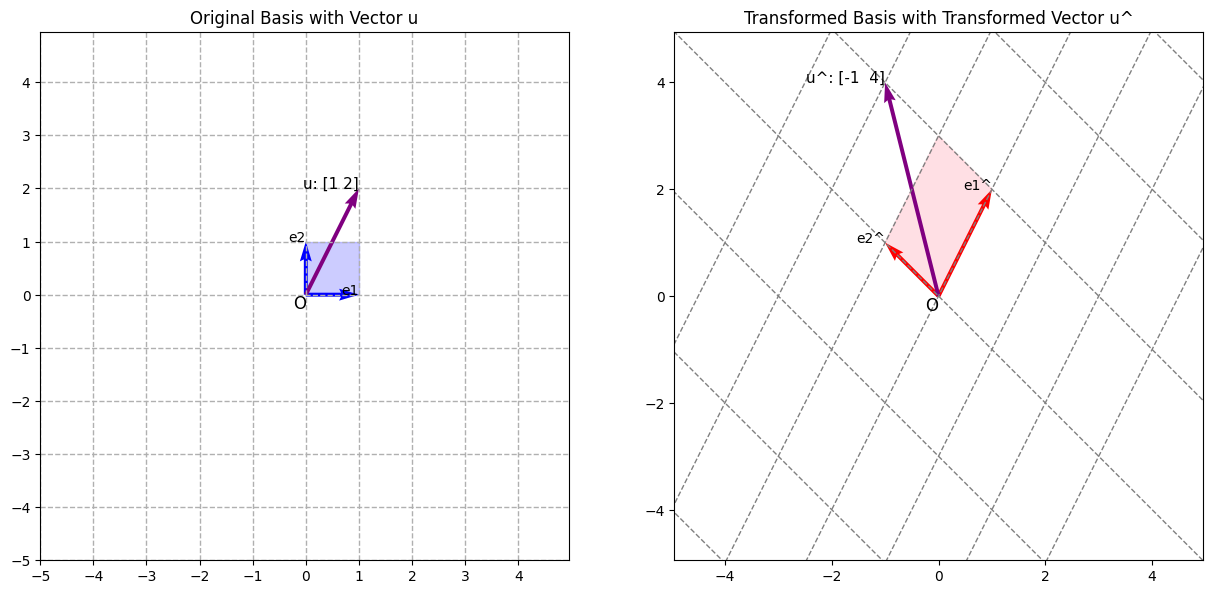

The Vector u = [1 2]
The Matrix = 
 [[ 1 -1]
 [ 2  1]]
The Transformed Vector u^ = [-1  4]



In [ ]:
# Example usage of the function
vector_u = np.array([1, 2])
transformation_matrix = np.array([[1, -1], [2, 1]])
plot_vector_transformation(vector_u, transformation_matrix)

## The Identity Matrix

The Identity Matrix plays a crucial role in linear algebra, especially in the context of linear transformations. It is defined such that, after applying a linear transformation represented by the Identity Matrix, the transformed vector remains identical to the original vector.

![Identity Matrix](https://wikimedia.org/api/rest_v1/media/math/render/svg/41e7cbed13b2f1ebfd2280887ba113427c7378ff)
*Image Source: https://wikimedia.org/api/rest_v1/media/math/render/svg/41e7cbed13b2f1ebfd2280887ba113427c7378ff*

#### Characteristics:

- **Preservation of Vectors**: When a vector is multiplied by the Identity Matrix, it undergoes a transformation that leaves it unchanged. This property is fundamental in various mathematical operations and algorithms.
  
- **Symbolic Representation**: The Identity Matrix is often denoted as `I`. In 2D space, a 2x2 Identity Matrix looks like `[1 0; 0 1]`, and it scales to higher dimensions similarly, always with 1s on the main diagonal and 0s elsewhere.

#### Geometric Interpretation:

- **No Transformation**: Geometrically, applying the Identity Matrix to a vector means no rotation, scaling, or translation occurs. The vector remains exactly as it was, preserving its direction and magnitude.




In [ ]:
# Define a vector
vector = np.array([3, 4, 5])

# Define the identity matrix of appropriate size
identity_matrix = np.identity(3)

# Multiply the vector by the identity matrix
result = np.dot(identity_matrix, vector)

# Print the original vector and the result
print("Original Vector:", vector)
print(f'Identity matrix \n {identity_matrix}')
print("Result after multiplying with identity matrix:", result)



Original Vector: [3 4 5]
Identity matrix 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Result after multiplying with identity matrix: [3. 4. 5.]


## Diagonal Matrix: A Tool for Scaling

A Diagonal Matrix is characterized by non-zero entries along its main diagonal, with zeros elsewhere. This structure makes it a powerful tool in linear algebra for scaling basis vectors.

![Diagonal Matrix Example](https://media.geeksforgeeks.org/wp-content/uploads/20221124161458/dm.jpg)

*Image Source: [GeeksforGeeks](https://media.geeksforgeeks.org/wp-content/uploads/20221124161458/dm.jpg)*

![Diagonal Matrix Visualization](https://gregorygundersen.com/image/matrices/diagonal.png)

*Image Source: [Gregory Gunderson](https://gregorygundersen.com/image/matrices/diagonal.png)*

#### Characteristics:

- **Scaling Basis Vectors**: The diagonal elements of a Diagonal Matrix represent the scaling factors for each basis vector. A value greater than 1 indicates stretching, while a value between 0 and 1 signifies compression.
  
- **Simplified Computations**: Due to its structure, multiplying vectors by a Diagonal Matrix simplifies to scaling each component of the vector by the corresponding diagonal element.

#### Outcomes of Applying a Diagonal Matrix:

- **Rotation and Scaling**: While primarily used for scaling, diagonal matrices can also contribute to rotation in higher dimensions when combined with other transformation matrices.
  
- **Preservation of Orthogonality**: Diagonal matrices maintain the orthogonality of the basis vectors, meaning they remain at right angles to each other post-transformation.

---


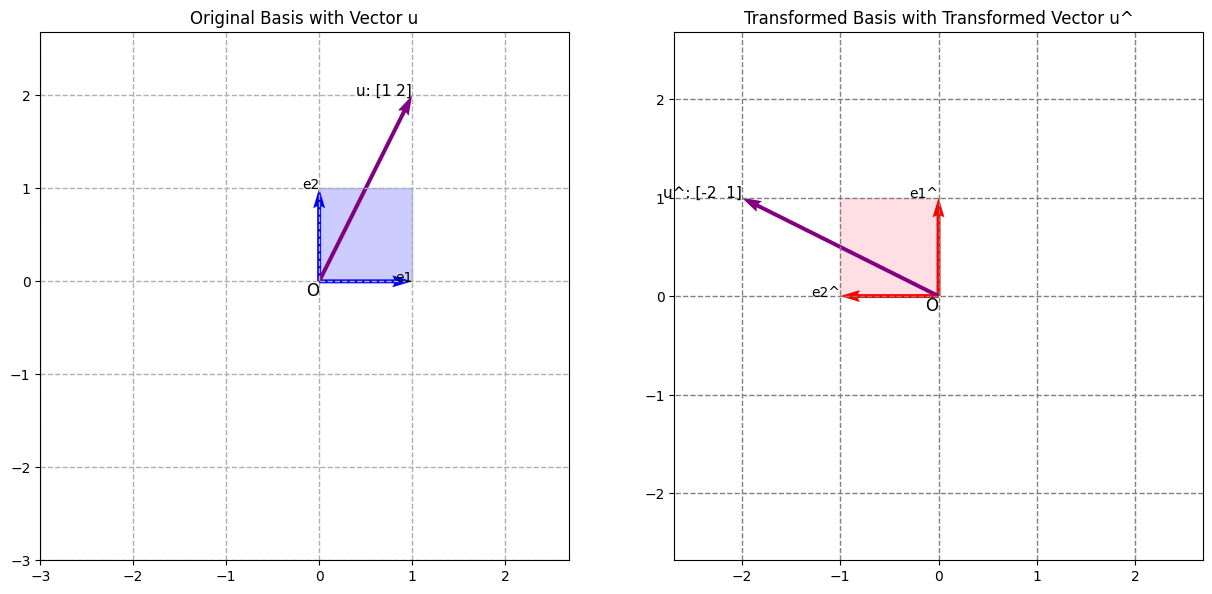

The Vector u = [1 2]
The Matrix = 
 [[ 0 -1]
 [ 1  0]]
The Transformed Vector u^ = [-2  1]



In [ ]:
vector_u = np.array([1, 2])
transformation_matrix = np.array([[0, -1], [1, 0]])
plot_vector_transformation(vector_u, transformation_matrix)

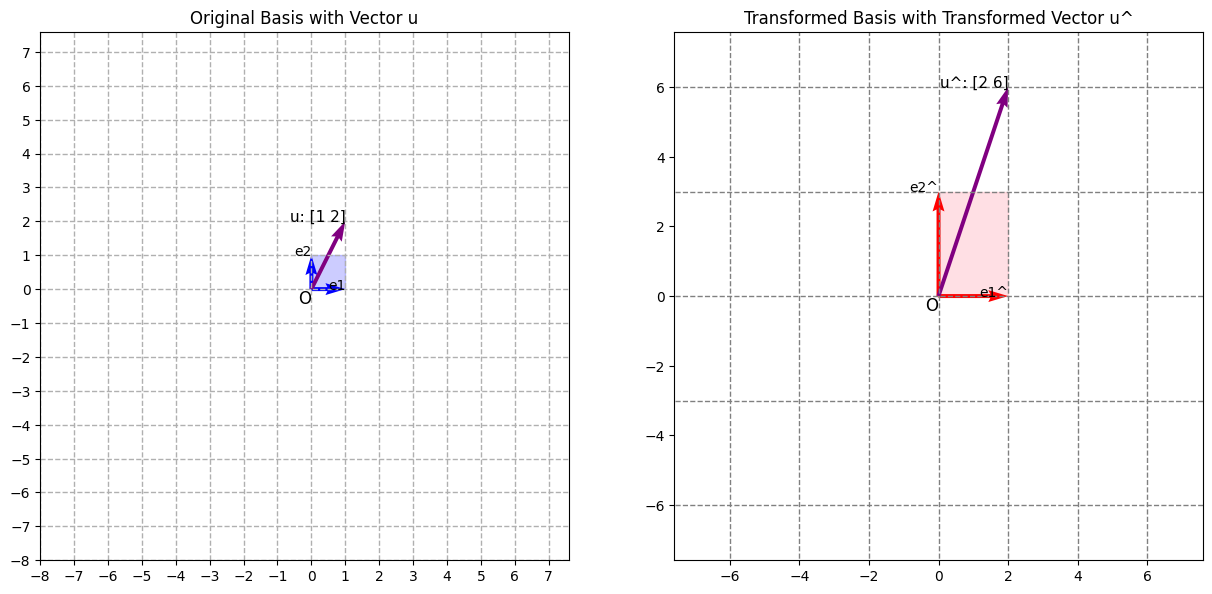

The Vector u = [1 2]
The Matrix = 
 [[2 0]
 [0 3]]
The Transformed Vector u^ = [2 6]



In [ ]:
vector_u = np.array([1, 2])
transformation_matrix = np.array([[2, 0], [0, 3]])
plot_vector_transformation(vector_u, transformation_matrix)

## Determinant of a Square Matrix

### Properties of the Determinant

The determinant of a square matrix is a scalar value that provides critical insights into the nature of the linear transformation represented by the matrix.

#### Why Not for Non-Square Matrices?

- **Dimensionality Change**: Non-square matrices alter the dimensionality of the space (e.g., from 2D to 3D or vice versa), leading to no consistent 'volume' or 'area' to compare before and after the transformation. Thus, a determinant is not defined for non-square matrices.

![Determinant Visualization](https://miro.medium.com/v2/resize:fit:1400/1*cq4J4JNDaqTLCR3D1TJzsQ.gif)

*Image Source: [Determinant Visualization](https://miro.medium.com/v2/resize:fit:1400/1*cq4J4JNDaqTLCR3D1TJzsQ.gif)*

#### Geometric Meaning of the Determinant

- **Volume Change in Space**: The determinant reflects the volume change of a space under the linear transformation. It tells us how the transformation scales the volume of the space.
  
- **Types of Transformations**:
  - **Dimension Reduction (Not Full Rank)**: If a transformation reduces the dimension (like flattening 3D to 2D), the space gets 'squeezed', making the determinant zero.
  - **Rotation**: In rotations, the volume does not change, so the determinant is 1 or -1. The sign of the determinant indicates the direction (e.g., right-hand or left-hand rotation).

---



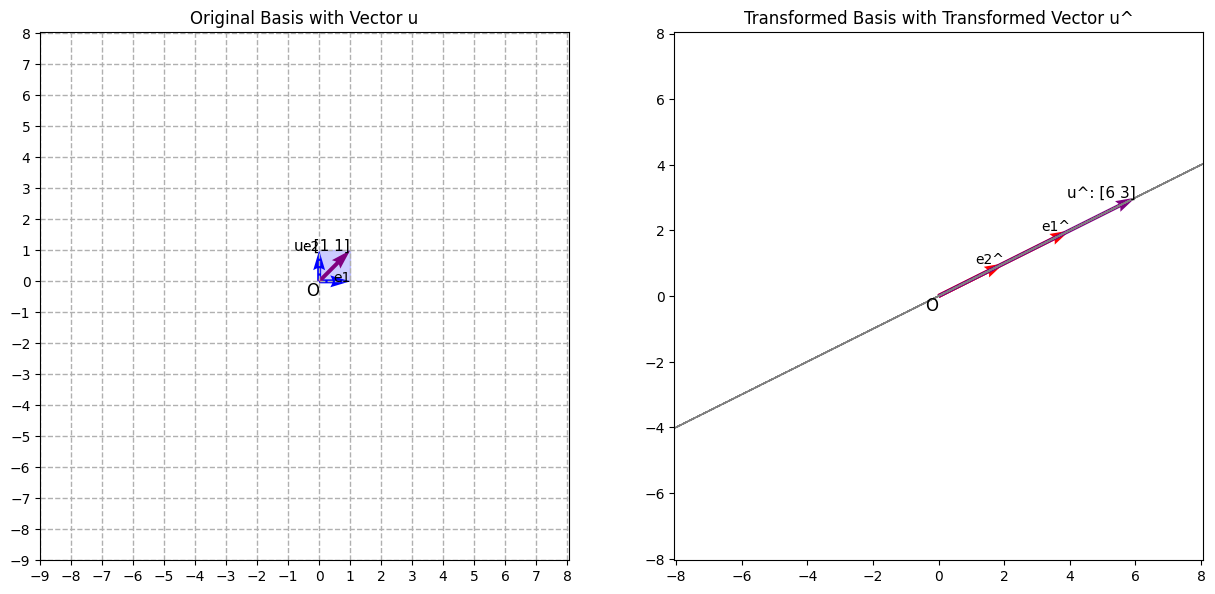

The Vector u = [1 1]
The Matrix = 
 [[4 2]
 [2 1]]
The Transformed Vector u^ = [6 3]

det of matrix = 0.0


In [ ]:
vector_u = np.array([1,1])
transformation_matrix = np.array([[4, 2], [2, 1]])
plot_vector_transformation(vector_u, transformation_matrix)

print(f'det of matrix = {np.linalg.det(transformation_matrix)}')

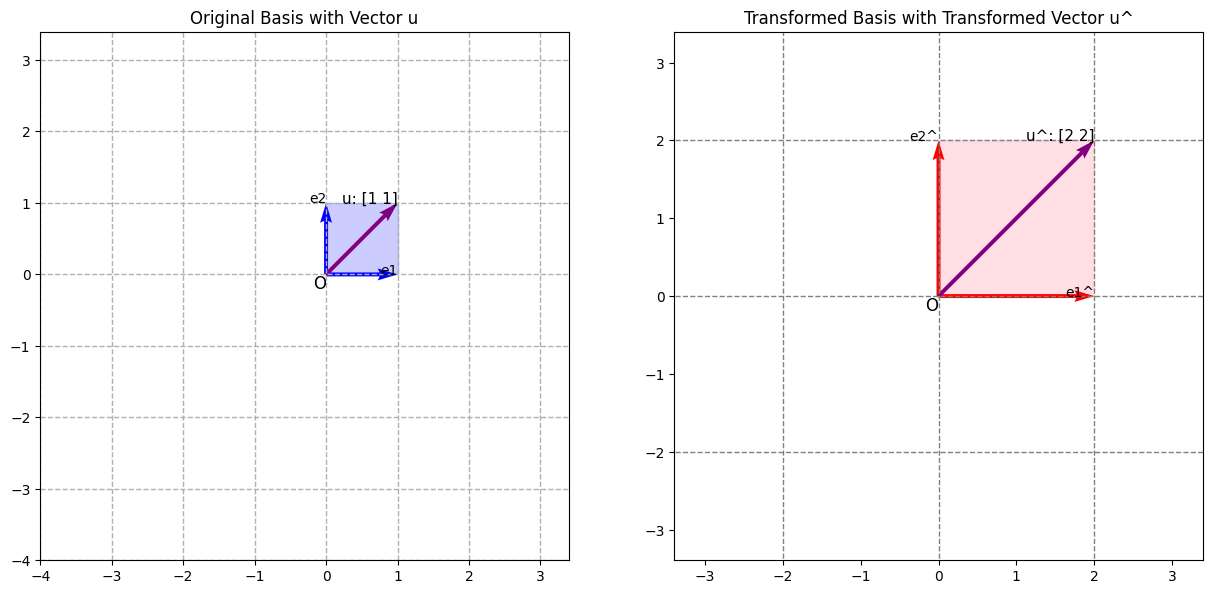

The Vector u = [1 1]
The Matrix = 
 [[2 0]
 [0 2]]
The Transformed Vector u^ = [2 2]

det of matrix = 4.0


In [ ]:
vector_u = np.array([1, 1])
transformation_matrix = np.array([[2, 0], [0, 2]])
plot_vector_transformation(vector_u, transformation_matrix)

print(f'det of matrix = {np.linalg.det(transformation_matrix)}')

# Property of Matrix: Rank

## Understanding the Rank of a Matrix

The rank of a matrix is a fundamental concept in linear algebra that reflects the maximum number of linearly independent column vectors in the matrix. It represents the dimensionality of the space spanned by these columns.

### Definition and Geometric Interpretation

- **Rank**: The dimension of the column space (the space spanned by the columns) of a matrix.
- **Equivalence**: Equal to the number of independent column vectors in the matrix.

![Basis for a Plane](https://upload.wikimedia.org/wikipedia/commons/thumb/7/70/Basis_for_a_plane.svg/2560px-Basis_for_a_plane.svg.png)
*Image Source: [Basis for a Plane](https://upload.wikimedia.org/wikipedia/commons/thumb/7/70/Basis_for_a_plane.svg/2560px-Basis_for_a_plane.svg.png)*

- **Geometric Meaning**: The rank determines the number of dimensions in which the vectors span. For example, a rank of 2 in a 3D space means the vectors span a plane within that space.

![Linear Transformation](https://qph.cf2.quoracdn.net/main-qimg-0e3e49804f5c871708b90254e78494cf)

*Image Source: [Linear Transformation](https://qph.cf2.quoracdn.net/main-qimg-0e3e49804f5c871708b90254e78494cf)*

### Rank in Square Matrices

- For an n*n square matrix, if the rank \(r < n\), it indicates a dimension-reducing transformation.
- **Implication**: Such transformations 'squeeze' the space, leading to a determinant (volume change coefficient) of 0.

---

In [ ]:
A = np.array([[5, -2,7], [2, -1,3],[10,5,5]])
rank_A= np.linalg.matrix_rank(A)
det_A=np.linalg.det(A)

print(f'Matrix \n {A}\n')
print(f'Rank = {rank_A} \n')
print(f'Det = {det_A}\n')

Matrix 
 [[ 5 -2  7]
 [ 2 -1  3]
 [10  5  5]]

Rank = 2 

Det = 0.0



# Invertible Matrix

## Understanding the Concept of an Invertible Matrix

An invertible matrix represents a 'two-way' linear transformation, allowing transformations from $ u $ to $ v $ and reversibly from $ v $ back to $ u $.

### Key Properties and Definitions

- **Two-Way Transformation**: For a matrix $ A $ to be invertible, the transformation $ A \cdot u = v $ must be reversible, implying no loss of information.
- **Requirement for Invertibility**:
  - **Square Matrix**: Invertibility requires the matrix to be square (equal rows and columns), indicating a same-dimension transformation.
  - **Full Rank**: The matrix must have full rank (rank equal to its dimension), meaning it preserves the dimensionality of the space.
  - **Non-Singular**: A non-singular matrix has a determinant not equal to 0
  ($ \det(A) \neq 0 $), a crucial condition for invertibility.

### Singular Matrix and Inverse Relationship

- **Definition of Singular Matrix**: A singular matrix is a square matrix that does not preserve dimensionality (rank less than its dimension), resulting in a determinant of 0. Such matrices are not invertible.
- **Inverse and Singular Relationship**:
  - The existence of an inverse matrix is directly tied to the matrix not being singular.
  - A matrix is invertible if and only if it is non-singular. In other words, singular matrices do not have an inverse, while non-singular matrices do.

![Matrix Inversion](https://miro.medium.com/v2/resize:fit:868/0*MBwf7O6zh2RlJTCM.png)

*Image Source: [Matrix Inversion](https://miro.medium.com/v2/resize:fit:868/0*MBwf7O6zh2RlJTCM.png)*

### Example: Rotation Matrix

- **Original Transformation (A)**: Anticlockwise rotation of 90 degrees.
- **Inverse Transformation ($ A_{\text{inv}} $)**: The inverse transformation is a clockwise rotation of 90 degrees, effectively undoing the original transformation.

---

**Key Takeaways:**
- Invertibility in matrices is a critical property that allows for reversible transformations, crucial in various mathematical and real-world applications.
- The relationship between invertibility and singularity is fundamental: only non-singular square matrices can be inverted, as they do not reduce dimensions or lose information.



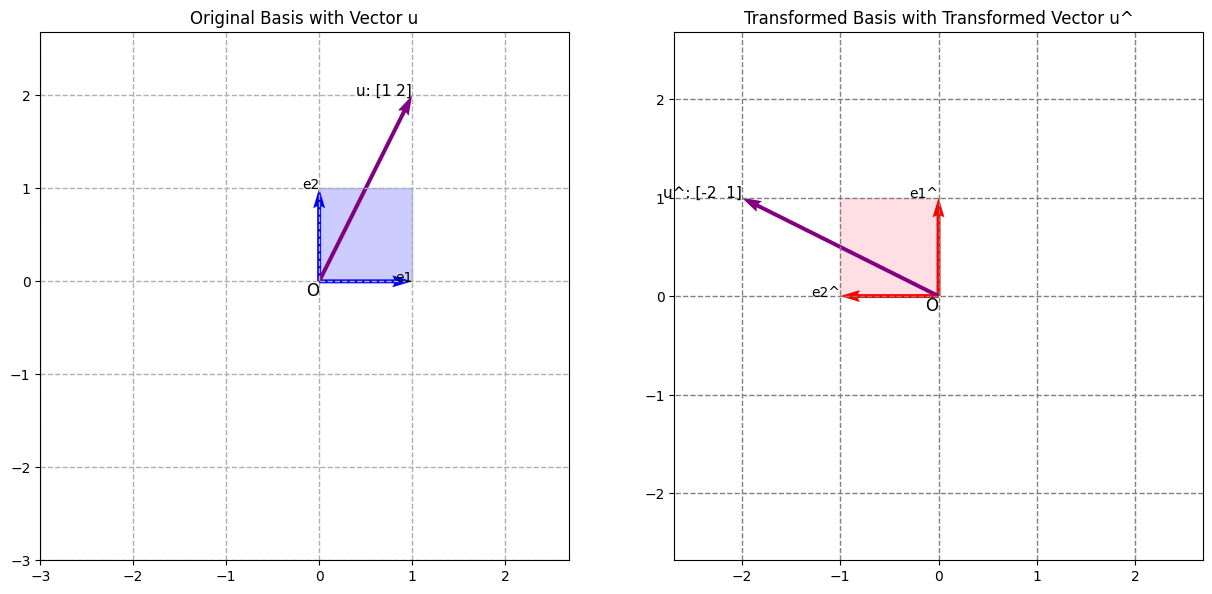

The Vector u = [1 2]
The Matrix = 
 [[ 0 -1]
 [ 1  0]]
The Transformed Vector u^ = [-2  1]



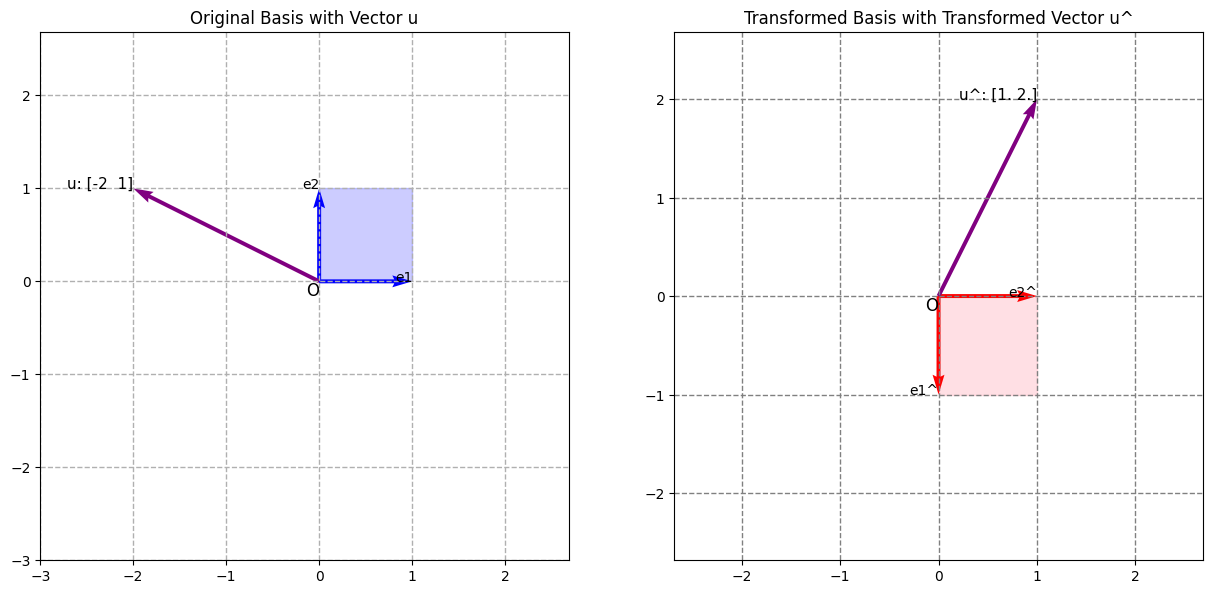

The Vector u = [-2  1]
The Matrix = 
 [[ 0.  1.]
 [-1. -0.]]
The Transformed Vector u^ = [1. 2.]

The A_inv *A = 
 [[1. 0.]
 [0. 1.]]


In [ ]:
vector_u = np.array([1, 2])
A= np.array([[0, -1], [1, 0]])
plot_vector_transformation(vector_u, A)

vector_u = np.array([-2, 1])
A_inv = np.linalg.inv(A)
plot_vector_transformation(vector_u, A_inv)

# show the A-inv * A is the I
print(f'The A_inv *A = \n {A_inv @ A}')

# Eigenvectors and Eigenvalues

## Understanding Eigenvectors in Linear Transformations

Eigenvectors and eigenvalues play a fundamental role in understanding the behavior of linear transformations, especially with square matrices.

### Eigenvectors

An eigenvector of a square matrix $ A $ (representing a linear transformation) is a non-zero vector that does not change its direction under the transformation. Instead, it gets scaled (which could include negative scaling).

![Eigenvector Visualization](https://i.makeagif.com/media/6-21-2018/_BSQFH.gif)

*Image Source: [Eigenvector Visualization](https://i.makeagif.com/media/6-21-2018/_BSQFH.gif)*

- **Geometric Interpretation**: Geometrically, an eigenvector remains aligned in its original direction even after the transformation by the matrix.
- **Exception**: For rotation matrices, no vector maintains its direction, implying there are no eigenvectors for pure rotation matrices.

### Eigenvalues

An eigenvalue is a scalar associated with an eigenvector, indicating how much the eigenvector is stretched or compressed during the transformation.

### Finding Eigenvectors and Eigenvalues

To find eigenvectors and eigenvalues, we use the equation:

$$ A \cdot \text{eigenvector} = \lambda \cdot \text{eigenvector} $$

Where $ \lambda $ is the eigenvalue. This can be transformed to find solutions for:

$$ \det(A - \lambda \cdot I) = 0 $$

![Eigenvalue Calculation](https://i.makeagif.com/media/11-03-2020/czgL0B.gif)

*Image Source: [Eigenvalue Calculation](https://i.makeagif.com/media/11-03-2020/czgL0B.gif)*

---

**Key Insights:**
- Eigenvectors are vectors that maintain their direction under a linear transformation, while eigenvalues quantify the scaling effect on these vectors.
- Solving for eigenvectors and eigenvalues involves finding values for which the transformation matrix, less a scaled identity matrix, has a determinant of zero.


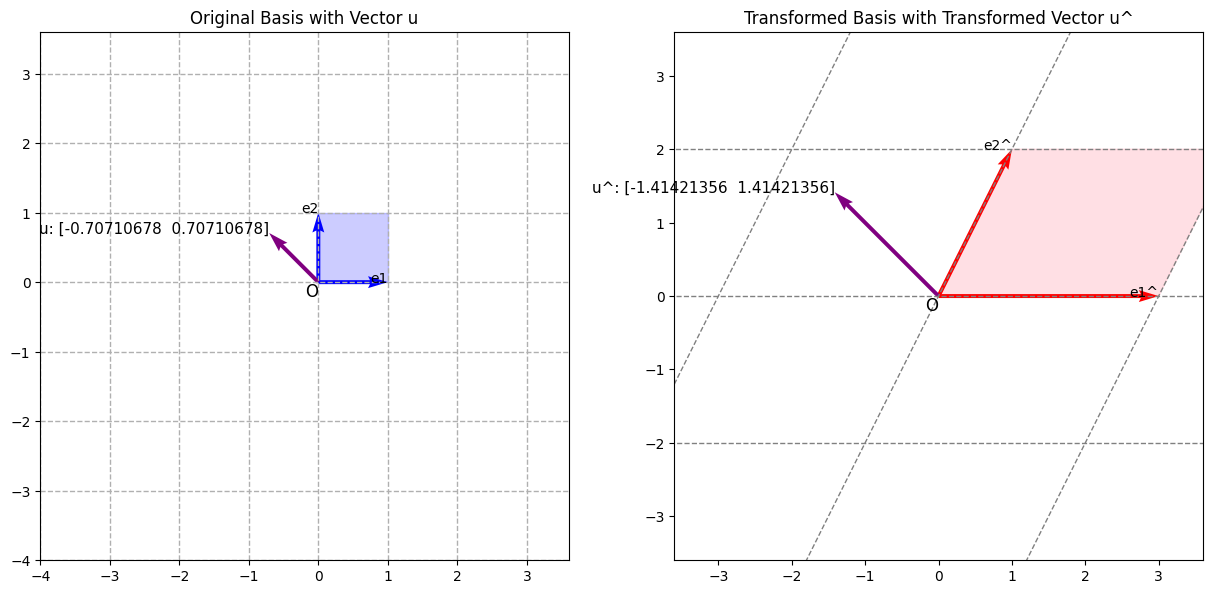

The Vector u = [-0.70710678  0.70710678]
The Matrix = 
 [[3 1]
 [0 2]]
The Transformed Vector u^ = [-1.41421356  1.41421356]

eigenvector =
 [-0.70710678  0.70710678]
eigenvalues= 2.0


In [ ]:
# Example to show that eigenvector does not change the direction after the linear transformation
A= np.array([[3, 1], [0, 2]])
eigenvalues, eigenvectors = np.linalg.eig(A)
eigenvector=eigenvectors[:, 1]
eigenvalue=eigenvalues[1]

plot_vector_transformation(eigenvector, A)
print(f'eigenvector =\n {eigenvector}')
print(f'eigenvalues= {eigenvalue}')

# Eigenbasis and Diagonalizing a Matrix

## Understanding Eigenbasis and Matrix Diagonalization

Eigenbasis and diagonalization are key concepts for simplifying matrix transformations.

### Eigenbasis: Simplifying Transformation

For a square matrix of size $n \times n$, if it has $n$ linearly independent eigenvectors, these can form a new basis - the eigenbasis.

- **Eigenbasis**: A set of eigenvectors that spans an eigenspace of the same dimension as the matrix.
- **Diagonalization**: When a matrix has a full set of eigenvectors, it can be simplified by viewing it in the eigenbasis, acting like a diagonal matrix that scales each eigenvector independently.

![Diagonalization as Rotation](https://upload.wikimedia.org/wikipedia/commons/4/4e/Diagonalization_as_rotation.gif)
*Image Source: [Diagonalization as Rotation](https://upload.wikimedia.org/wikipedia/commons/4/4e/Diagonalization_as_rotation.gif)*

### Changing Basis

Understanding how matrices transform between different basis systems is crucial.

![Basis Transformation](https://i.makeagif.com/media/11-11-2016/lsw6S_.gif)

*Image Source: [Basis Transformation](https://i.makeagif.com/media/11-11-2016/lsw6S_.gif)*

- **Translation between Bases**:
  - Let $Q$ represent the matrix formed by the eigenvectors (eigenbasis).
  - The transformation matrix $A$ in the standard basis becomes a simple scaling matrix, denoted as $\Lambda$, in the eigenbasis.
  - $Q$ translates from the eigenbasis to the standard basis, and $Q^{-1}$ translates back to the eigenbasis.

- **Diagonalization Process**:
  - $\Lambda = Q^{-1} \cdot A \cdot Q$
  - $\Lambda$ contains all the corresponding eigenvalues on its diagonal.

### Advantages of Diagonalization

- **Ease of Computation**: Diagonalizing a matrix simplifies calculating its powers, as the powers of a diagonal matrix are easy to compute.

![Matrix Powers](https://i.ytimg.com/vi/_VliOMuk3VY/mqdefault.jpg)

*Image Source: [Matrix Powers](https://i.ytimg.com/vi/_VliOMuk3VY/mqdefault.jpg)*

---

**Key Insights:**
- An eigenbasis offers a simplified perspective of a matrix, revealing its core behavior as individual scalings along each eigenvector.
- Diagonalization is a powerful technique for simplifying complex transformations, especially useful in calculations involving matrix powers.

<a name='3'></a>
## Application of Eigenvalues and Eigenvectors: Navigate Page based on Markov Matrix

Multiple components describing some structure can be organized as a single vector. If the state of the structure is changing in time due to some process, the vector is referred as a **state vector**. Such dynamic processes are often modeled at discrete times calculating the state vector as a linear transformation of a previous state vector. This model is called a **discrete dynamical system**.

Starting with an initial state $X_0$, the transition to the next state $X_1$ is a linear transformation defined with a matrix $P$: $X_1=PX_0$. That leads to $X_2=PX_1=P^2X_0$, $X_3=P^3X_0$, and so on. This implies that $X_t=PX_{t-1}$ for $t=0,1,2,3,\ldots$.

A discrete dynamical system can be used to model browsing web pages. Web pages often contain links to other pages, for simplicity assume that the browser is only following links to a new page rather than navigating to an unlinked one.

Let the probabilities that the browser is on a particular page at time $t$ be a state vector $X_t$. Navigation from one page to another advances the model from one state vector $X_{t-1}$ to another state vector $X_t$. A linear transformation, defined by a matrix $P$, will have entries $a_{ij}$ with the probabilities that the browser navigates to page $i$ from page $j$. For fixed column $j$, the entries represent a probability distribution describing location of the browser at the next step. Thus, the entries in each column must add to one.



Set matrix $P$ for a small number of pages $n=4$. All elements on the main diagonal should be equal to $0$, and the entries in each column must add to one. Here is an example of such a matrix for $n=4$:

$$P=
\begin{bmatrix}
0 & 0.75 & 0.35 & 0.85 \\
0.15 & 0 & 0.35 & 0.05 \\
0.30 & 0.20 & 0 & 0.1 \\
0.55 & 0.05 & 0.30 & 0
\end{bmatrix}\
$$

Define vector $X_0$, so the browser starts navigation at page $2$ ($X_0$ is a vector with a single entry equal to one, and all other entries equal to zero). Apply the transformation once: $X_1=PX_0$ to find a vector of the probabilities that the browser is at each of five pages.

### Markov Matrix

A square matrix is called a **Markov matrix** if all entries are nonnegative and the sum of each column elements is equal to $1$. Markov matrices have a handy property - they always have an eigenvalue equals to 1.


In [ ]:
### START CODE HERE ###
# Based on the example above for n=2 define matrix P for n=5,
# such that all elements on the main diagonal should be equal to 0,
# and the entries in each column must add to one.
P = np.array([
    [0, 0.75, 0.35, 0.85],
    [0.15, 0, 0.35, 0.05],
    [0.30, 0.20, 0, 0.1],
    [0.55, 0.05, 0.30, 0]
])
X0 = np.array([[0], [1], [0], [0]])
# Multiply matrix P and X_0 (matrix multiplication).
X1 = P@X0

print(sum(P))
print(X1)

[1. 1. 1. 1.]
[[0.75]
 [0.  ]
 [0.2 ]
 [0.05]]


Applying the transformation $m$ times you can find a vector $X_m$ with the probabilities of the browser being at each of the pages after $m$ steps of navigation.

In [ ]:

# Define the Markov matrix P
P = np.array([
    [0, 0.75, 0.35, 0.85],
    [0.15, 0, 0.35, 0.05],
    [0.30, 0.20, 0, 0.1],
    [0.55, 0.05, 0.30, 0]
])

# Normalize P to ensure each column sums to 1
P = P / P.sum(axis=0)

# Initial state vector X
X = np.array([0, 1, 0, 0])  # Converted to 1D array for easier handling

def markov_process(P, X, m):
    states = [X]
    for _ in range(m):
        X = P @ X
        states.append(X)
    # Convert states to DataFrame for table visualization
    state_df = pd.DataFrame(states, columns=[f'P{i+1}' for i in range(P.shape[0])])
    state_df.index.name = 'Step'
    return state_df

# Number of steps
m = 50

# Run the Markov process
state_df = markov_process(P, X, m)
state_df

,P1,P2,P3,P4
Step,,,,
0,0.000000,1.000000,0.000000,0.000000
1,0.750000,0.000000,0.200000,0.050000
2,0.112500,0.185000,0.230000,0.472500
3,0.620875,0.121000,0.118000,0.140125
4,0.251156,0.141437,0.224475,0.382931
5,0.510136,0.135386,0.141927,0.212550
6,0.331882,0.136823,0.201373,0.329922
7,0.453531,0.136759,0.159921,0.249788
8,0.370862,0.136492,0.188390,0.304257


It is interesting to predict the probabilities in $X_m$ when $m$ is large, and thus determining what pages a browser are more likely to visit after this sort of random navigation. To do that you have to apply the transformation many times, and in real life problems this will be computationally expensive. Eigenvalues and eigenvectos can help here significantly reducing the amount of calculations.


Matrix $P$ was defined in such a way, that it is actually a Markov matrix, and you can see that it has an eigenvalue $1$. The equation $X_m=PX_{m-1}$ can be rewritten as $PX_{m-1}=1\times X_m$. Predicting probabilities in $X_m$ when $m$ is large you can actually look for an eigenvector corresponding to the eigenvalue $1$, because then you will get $PX = X$.

In [ ]:
X_eigen = np.linalg.eig(P)[1][:,0]
X_eigen = X_eigen / sum(X_eigen) # normalize it make it sum to 1
X_check = P@X_eigen

print("Eigenvector corresponding to the eigenvalue 1:\n" + str(X_eigen))
print("Result of multiplication:" + str(X_check))

print(f'\n Compare to the last iteration page probability result')
state_df.iloc[-1:]

Eigenvector corresponding to the eigenvalue 1:
[0.40427941 0.13664667 0.17683686 0.28223707]
Result of multiplication:[0.40427941 0.13664667 0.17683686 0.28223707]

 Compare to the last iteration page probability result


,P1,P2,P3,P4
Step,,,,
50,0.404279,0.136647,0.176837,0.282237



<img src="https://github.com/kenjihiranabe/The-Art-of-Linear-Algebra/raw/main/MatrixWorld.png" width="800" height="600" />

https://github.com/kenjihiranabe/The-Art-of-Linear-Algebra/raw/main/MatrixWorld.png

# Summary

This lesson provides a deep dive into the use and significance of matrices in AI, exploring their geometric applications, and key concepts like inverse matrices, singular properties, and matrix rank.

## Key Topics Covered

- **Matrices as Data Representation in Machine Learning**
  - Role of matrices in structuring AI and machine learning data.
  - Efficient representation of both structured and unstructured data such as images, text, and audio.


- **Geometric Approach of Matrices**
  - Matrices as linear transformations in space.
  - Understanding the role of matrix columns as new basis vectors in transformed spaces.

- **The Identity Matrix**
  - Exploration of identity matrices in preserving vector transformations.
  - Key properties and geometric interpretation.

- **Determinants of Square Matrices**
  - Significance of determinants in volume change under linear transformations.
  - Distinction between dimension-reducing transformations and rotations.

- **Diagonal Matrices**
  - The use of diagonal matrices for scaling basis vectors.
  - Simplification of computations and preservation of vector orthogonality.

- **Invertible and Singular Matrices**
  - Understanding invertible matrices and their 'two-way' transformation capability.
  - Relationship between singular matrices and invertibility.

- **Matrix Rank**
  - Definition and geometric interpretation of matrix rank.
  - Importance of rank in understanding linear transformations.


- **Eigenvalues and Eigenvectors**
  - Demonstrating how eigenvalues and eigenvectors simplify complex transformations.

## Application in AI

- **Markov Matrices in Web Navigation**
  - Application of Markov matrices to model probabilities in web page navigation.
  - Use of eigenvalues and eigenvectors for predicting long-term browsing behaviors.
